In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn import ensemble
from sklearn import metrics
from sklearn import naive_bayes

## Loading Cleaned Dataset
The dataset has already been cleaned and is included in parent directory.

In [2]:
data=pd.read_csv('epl.csv')
data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR_A,HTR_D,HTR_H,Season S_Year,Season E_Year
0,Arsenal,Coventry,0,3,A,0,1,1,0,0,1993,1994
1,Aston Villa,QPR,4,1,H,1,1,0,1,0,1993,1994
2,Chelsea,Blackburn,1,2,A,1,1,0,1,0,1993,1994
3,Liverpool,Sheffield Weds,2,0,H,1,0,0,0,1,1993,1994
4,Man City,Leeds,1,1,D,1,1,0,1,0,1993,1994


## Dropping Features and Separating X and y
Here we drop certain features such as FTHG, FTAG, and Season information and separate dataset into features and target classes.

In [3]:
target=data['FTR']
data.drop(columns=['FTR', 'Season S_Year', 'Season E_Year'], inplace=True)
target.head()

0    A
1    H
2    A
3    H
4    D
Name: FTR, dtype: object

In [4]:
data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR_A,HTR_D,HTR_H
0,Arsenal,Coventry,0,3,0,1,1,0,0
1,Aston Villa,QPR,4,1,1,1,0,1,0
2,Chelsea,Blackburn,1,2,1,1,0,1,0
3,Liverpool,Sheffield Weds,2,0,1,0,0,0,1
4,Man City,Leeds,1,1,1,1,0,1,0


Using label encoding to make n classes represented by integers.

In [5]:
le=LabelEncoder()
data['HomeTeam']=le.fit_transform(data.HomeTeam.values)
data['AwayTeam']=le.fit_transform(data.AwayTeam.values)
target=le.fit_transform(target.values)

In [6]:
target

array([0, 2, 0, ..., 0, 2, 2])

In [7]:
data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR_A,HTR_D,HTR_H
0,0,14,0,3,0,1,1,0,0
1,1,34,4,1,1,1,0,1,0
2,13,4,1,2,1,1,0,1,0
3,24,37,2,0,1,0,0,0,1
4,25,22,1,1,1,1,0,1,0


**We drop FTAG and FTHG which can be used to directly get FTR (target value).**

In [8]:
data=data.drop(columns=['FTAG', 'FTHG'])
data.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR_A,HTR_D,HTR_H
0,0,14,0,1,1,0,0
1,1,34,1,1,0,1,0
2,13,4,1,1,0,1,0
3,24,37,1,0,0,0,1
4,25,22,1,1,0,1,0


## Splitting dataset into training and testing data

In [9]:
X_train, X_test, y_train, y_test=train_test_split(data, target, test_size=0.3, random_state=110, stratify=target)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6764, 7) (2900, 7) (6764,) (2900,)


### Support Vector Machines (SVM)

In [10]:
svmclf=svm.SVC(kernel='linear')
svmclf.fit(X_train, y_train)
y_pred=svmclf.predict(X_test)
svmclf.score(X_test, y_test)

0.613103448275862

### Naive Bayes

In [11]:
nbclf=naive_bayes.GaussianNB()
nbclf.fit(X_train, y_train)
y_pred=nbclf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.613103448275862

### Ensemble Algorithms
They provide a marginal improvement in accuracy over SVM and Naive Bayes.
### Ada Boost Classifier

In [12]:
ada=ensemble.AdaBoostClassifier(n_estimators=1000,random_state=5)
ada.fit(X_train, y_train)
y_pred=ada.predict(X_test)
ada.score(X_test, y_test)

0.6258620689655172

### Gradient Boosting

In [13]:
gbc=ensemble.GradientBoostingClassifier(n_estimators=100,random_state=5, subsample=0.8)
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
gbc.score(X_test, y_test)

0.6272413793103448

### Histogram Gradient Boost

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting 
hist=ensemble.HistGradientBoostingClassifier(loss='categorical_crossentropy', max_iter=10)
hist.fit(X_train, y_train)
y_pred=hist.predict(X_test)
hist.score(X_test, y_test)

### Voting Classifier
This takes a list of classifiers and takes the majority result. Gives a marginal improvement in accuracy over singular ensemble algorithms.

In [14]:
estm=[('rf', ensemble.RandomForestClassifier(n_estimators=50,warm_start=True, random_state=5)), 
      ('ada', ensemble.AdaBoostClassifier(n_estimators=1000,random_state=5)),
     ('gbc', ensemble.GradientBoostingClassifier(n_estimators=100,random_state=5, subsample=0.8)),
     ('svc', svm.SVC(kernel='linear'))]
vtc=ensemble.VotingClassifier(estimators=estm)
vtc.fit(X_train, y_train)
y_pred=vtc.predict(X_test)
vtc.score(X_test, y_test)

0.63

In [15]:
test_values=[np.count_nonzero(y_test==0),np.count_nonzero(y_test==1), np.count_nonzero(y_test==2)]
pred_values=[np.count_nonzero(y_pred==0),np.count_nonzero(y_pred==1), np.count_nonzero(y_pred==2)]
test_values

[797, 764, 1339]

In [16]:
pred_values

[741, 943, 1216]

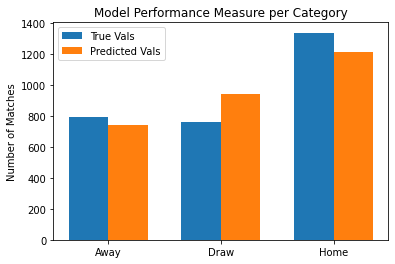

In [24]:
plt.figure()
N=3
width=0.35
idx=np.arange(N)
plt.bar(idx, test_values, width, label='True Vals')
plt.bar(idx+width, pred_values, width, label='Predicted Vals')
plt.ylabel('Number of Matches')
plt.title('Model Performance Measure per Category')
plt.xticks(idx + width / 2, ('Away', 'Draw', 'Home'))
plt.legend(loc='best')
plt.show()